# Linear Regression

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

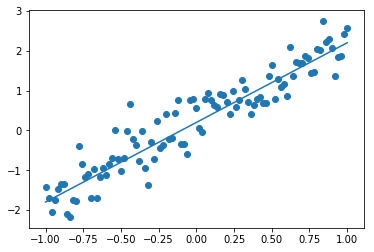

In [2]:
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.4 + 0.2
plt.figure()
plt.scatter(trX, trY)
plt.plot(trX, .2 + 2*trX)
plt.show()

1.9304416
0.28437123


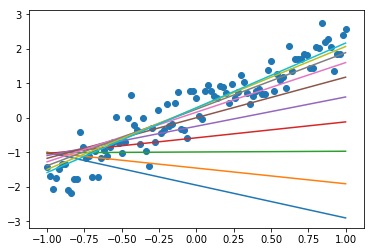

In [3]:
X = tf.placeholder("float", name="X")
Y = tf.placeholder("float", name="Y")

with tf.name_scope("Model"):
    
    def model(X, w, b):
        return tf.multiply(X, w) + b

    w = tf.Variable(-1.0, name="b0")
    b = tf.Variable(-2.0, name="b1")
    y_model = model(X, w, b)

with tf.name_scope("CostFunction"):
    cost = tf.reduce_mean(tf.square(Y-y_model))
    tf.summary.scalar("loss", cost)

train_step = tf.train.AdamOptimizer(0.05).minimize(cost)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
tf.train.write_graph(sess.graph, './', 'graph.pbtxt')
merged = tf.summary.merge_all()

writer = tf.summary.FileWriter('./', sess.graph)

for i in range(100):
    summary_str, _= sess.run([merged, train_step], feed_dict={X:trX, Y:trY})
    writer.add_summary(summary_str, i)
    writer.flush()
    b0tmp = b.eval(session=sess)
    b1tmp = w.eval(session=sess)
    if(i % 10 == 0):
        plt.plot(trX, b0tmp + b1tmp * trX)

print (sess.run(w))
print (sess.run(b))
plt.scatter(trX, trY)
plt.show()
writer.close()
sess.close()
